Our goal in this section of the lesson is to train decision trees to perform classification of unseen data.

To train a decision tree is to construct it. And we construct the tree from a dataset. But what dataset will we use? Luckily, scikit-learn has some built in!

# Exploring datasets

There is a built-in dataset about iris flowers: it suffices to import the `load_iris` function from the `sklearn.datasets` module, and call it to get the dataset.

In [1]:
from sklearn.datasets import load_iris
dataset = load_iris()

In [4]:
# But what's a dataset? Let's have a look.
# Simply evaluate this cell.
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

__Question:__ what's the type of dataset?

In [ ]:
# Whoa. One thing we can see is that it's a dictionary.
# We can see what all the keys in the dictionary are by using the `keys` function.
dataset.keys()

__Question:__ what do we write to get the names of the features out of the dataset?

In [3]:
# Your code here:


So this dataset has 4 features in it, all measured in centimeters, and referring to some physical measurements of the flowers.

The `data` and `target` entries in the dataset really are the data, whereas the `target_names` and `feature_names` entries are *metadata*; they tell us about the interpretation of the data.

The `data` and `target` entries are related. Let's see how.

In [ ]:
# The first entry of dataset['data'] is some measurements about a flower,
# and the first element of dataset['target'] tells us which kind of flower that is.
dataset['data'][0], dataset['target'][0]

So the data point `[5.1, 3.5, 1.4, 0.2]` is labelled `0`, which represents a flower species.

## Visual intuition for the dataset

Let's quickly get some intuition for what this dataset looks like by plotting it. Jupyter notebooks have built-in integration with the Python plotting library matplotlib. All this comes pre-installed with Anaconda.

Don't pay too much attention to the code here; we just want to get a quick visualization.

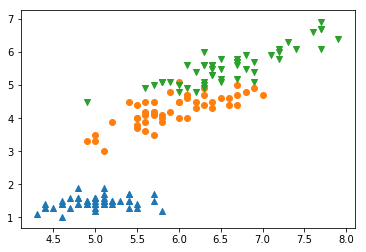

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline
both = list(zip(((x[0], x[2]) for x in dataset['data']), dataset['target']))
for i, mark in zip(set(dataset['target']), '^ov+'):
    X, Y = list(zip(*[p for p, d in both if d == i]))
    plt.scatter(X, Y, marker=mark)
plt.show()

This scatter plot uses the first feature for the X coordinate and the third feature for the Y coordinate; those are the sepal length and petal length, respectively. The different flower types are represented as different symbols in the plot.

### Questions

1. How many different _labels_ are there in this dataset?
2. How many _features_ does this plot consider? How many _features_ are there in total?
3. Using code, find out what the names of the flowers are in this dataset. Hint: you need to look up something in the `dataset` dictionary.
4. Using code, find out how many points there are in this dataset. Hint: use the `len` function.

In [ ]:
# Your solution to question 3 here:


In [ ]:
# Your solution to question 4 here:


# Decision trees

We are using decision trees as *classifiers*. In this notebook, you'll explore using the `DecisionTreeClassifier` from scikit-learn to construct decision trees.

In [5]:
from sklearn import tree

We import the `tree` module from the `sklearn` library. This module contains the `DecisionTreeClassifier`.

We can create a new classifier by calling `DecisionTreeClassifier`.

In [6]:
classifier = tree.DecisionTreeClassifier(max_depth=3)

We use the `.` operator to reach inside the module; since `DecisionTreeClassifier` is inside the `tree` module, we specify to Python to look inside the tree module (which we imported) and run the function `DecisionTreeClassifier`.

Now we want to train our classifier on the dataset we loaded earlier.

We do this using the `fit` function inside `classifier`. The `fit` function takes two inputs:
1. a list of X values (feature measurements)
2. a list of Y values (labels)

These two lists must have the same size!

__Question:__ Use the `fit` function to train the model. What X and Y values do we use? Hint: they're entries inside `dataset`.

In [7]:
# Your answer; replace the question marks:
classifier.fit(dataset['data'], dataset['target'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

We can visualize the decision tree that was created. Again, don't pay too much attention to this code; you could teach a separate course just about data visualization!

In [11]:
import graphviz # the library we need to visualize trees and graphs

# Define the visualization code as a function so we can reuse it later!
def visualize_tree(clf):
    dot_data = tree.export_graphviz(clf, feature_names=dataset['feature_names'], filled=True)
    return graphviz.Source(dot_data)

visualize_tree(classifier).render('tree.png')

'tree.png.pdf'

__Questions:__
1. This tree is very deep! Let's impose a maximum depth of 3 on the tree. Go back up to `classifier = tree.DecisionTreeClassifier()` and put `max_depth=3` in the parens. Re-run the training and visualization; what does the tree look like now?
2. What is the interpretation of the colors in the tree?
3. In each node of the tree, what is the relationship between the `samples = N` line and the `value = [...]` line?
4. Notice that in all the teal and purple nodes, the first count in `value` is always zero. Why is that?
5. What is the meaning of the `value` in each node?
5. Invent three data points. Choose feature values so that the first point falls into the orange leaf; the second, into the teal leaf; and the third, into the most purple leaf. Recall that leaves are nodes with no children.
   For example, a point with `petal width = 2.0` would follow the False branch of the root node. Choose the other parameters so that the point arrives at the desired classification.